#### load in modules

In [1]:
import matplotlib.pyplot as plt
import matplotlib.colors
import numpy as np

#### plot heatmap of lineage detection probabilities, as a function of lineage size and sampling proportion

In [8]:
# specify population size, and sampling fractions and lineage sizes to evaluate detection probability for
pop_size = 1000000  # 1 million (fixed)
s_to_evaluate = np.linspace(0, 0.16, 500)
n_to_evaluate = np.linspace(1, 10000, 10000).astype(int)

# vectorized probability calculation using NumPy broadcasting
# here we approximate the probability using the Complement rule which is reasonable for large N and small s
N = pop_size
k_values = np.round(N * s_to_evaluate)
prob_none = (1 - n_to_evaluate[:, None] / N) ** k_values
detection_probs = 1 - prob_none  # Complement rule

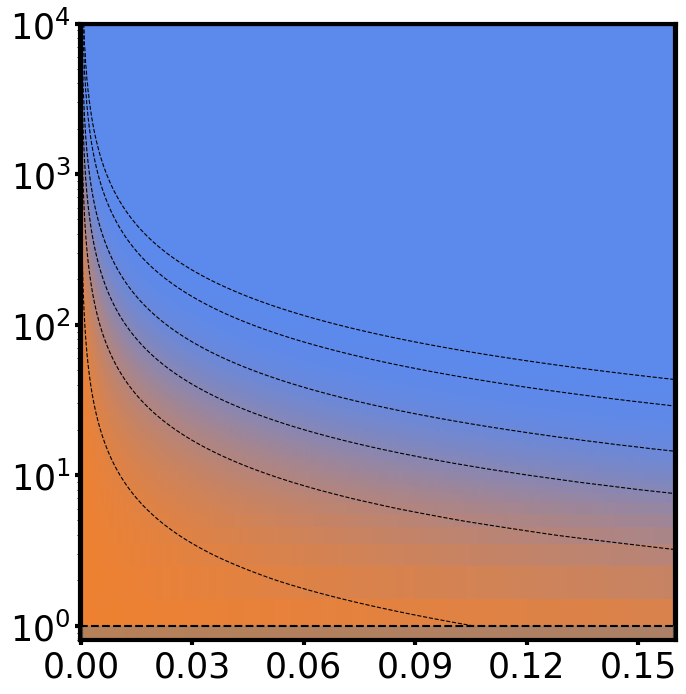

In [ ]:
# plot heatmap (with y on log scale)
fig, ax = plt.subplots(figsize=(7, 7.05))
cmap = matplotlib.colors.LinearSegmentedColormap.from_list('', ['#EE8131', '#5C89EC'])
im = ax.pcolormesh(s_to_evaluate, n_to_evaluate, detection_probs, cmap=cmap, shading='auto')

# add contour lines
ac = ax.contour(s_to_evaluate, n_to_evaluate, detection_probs,
                levels=[0.1, 0.4, 0.7, 0.9, 0.99, 0.999],
                linestyles='--', linewidths=0.8, colors='black')

# grey out area below y=1
ax.add_patch(plt.Rectangle((0, 0), max(s_to_evaluate), max(n_to_evaluate),
                           fill=False, edgecolor='black', lw=3))
# add horizontal line at y=1
ax.axhline(y=1, color='black', linestyle='--', linewidth=1.5)

# set log scale for y axis
ax.set_yscale('log')

# set x and y ticks
ax.set_xticks([0, 0.03, 0.06, 0.09, 0.12, 0.15])

# set y limits
ax.set_ylim(0.8, 10000)

# set x and y labels
ax.tick_params(axis='both', which='major', width=3, labelsize=25)

# add border around plot
for spine in ax.spines.values():
    spine.set_edgecolor('black')
    spine.set_linewidth(3)

# grey out area below y=1
ax.fill_between([0, max(s_to_evaluate)], 0, 1, color='grey', alpha=0.5)

# tight layout
plt.tight_layout()

# transparent background
fig.patch.set_alpha(0)
fig.patch.set_facecolor('none')
fig.patch.set_edgecolor('none')

# export figure
fig.savefig('./figures/lineage_detection_prob_heatmap.pdf', bbox_inches='tight')